In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



•	cp – chest pain type (4 values)
        1.	value 0 : typical angina 
        2.	value 1 : atypical angina 
        3.	value 2 : non-anginal pain
        4.	value 3 : asymptomatic
•	trestbps : resting blood pressure (in mm Hg on admission to the hospital) 
•	chol : serum cholesterol in mg/dl
•	fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
•	restecg : resting electrocardiographic results
        1.	value 0 : normal
        2.	value 1 : having ST-T wave abnormality(T wave inversion and/or ST elevation or depression of > 0.05mV)
        3.	value 2 : showing probable or definite left ventricular hypertrophy by Estes’s criteria
•	thalach : maximum heart rate achieved 
•	exang : exercise induced angina (1=yes; 0=no)
•	oldpeak : ST depression induced by exercise relative to rest (0 to 4 are considered to have a high probability of being diagnosed with heart disease.Positive values are more concerning than the negative values , 0 means no ST depression and above 0 that is 1,2,3.. indicate significant ST depression, potentially signaling a higher risk of heart attack. 
•	slope : the slope of the peak exercise ST segment 
        1.	value 1 : upsloping
        2.	value 2 : flat
        3.	value 3 : downsloping
•	ca : number of major vessels (0-3) colored by fluoroscopy 
•	thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
•	target : 0 = less chance of heart attack, 1 = more chance of heart attack 



In [4]:
data.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
data.shape

(1025, 14)

In [7]:
print("Number of rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of rows 1025
Number of Columns 14


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# to see the duplicate value

In [21]:
data_dup = data.duplicated().any()
print(data_dup) # true means we have duplictae values in the dataset 

True


# to drop the duplicate values 

In [3]:
data = data.drop_duplicates()

In [7]:
data.shape

(302, 14)

# to get overall statistics of the dataset

In [25]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# draw correlation Matrix

In [26]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

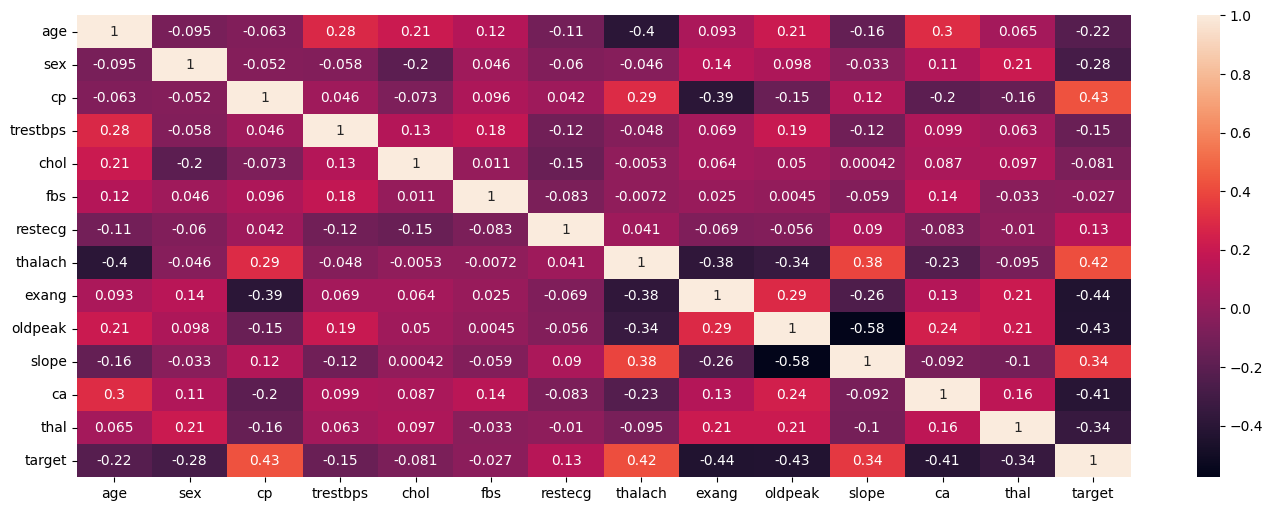

In [31]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(), annot = True) 

# 1.how many people have heart disease, and how many don't have heart disease in this dataset.

In [32]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

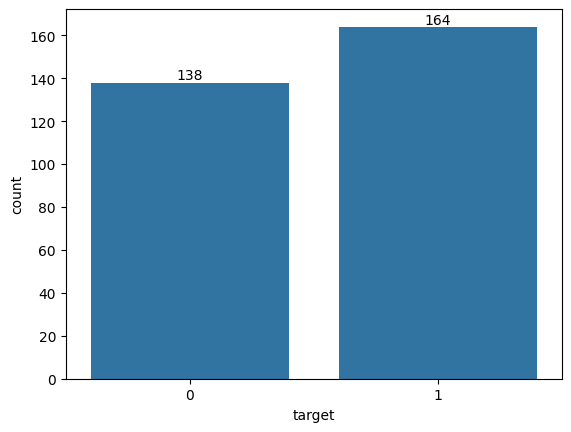

In [9]:
ax = sns.countplot(x = 'target',data = data) # 1 = yes & 0 = no 
for bars in ax.containers:
    ax.bar_label(bars)

# from this plot we can see that more than half of the people have heart disease 

# 2.find count of male and female in this dataset

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

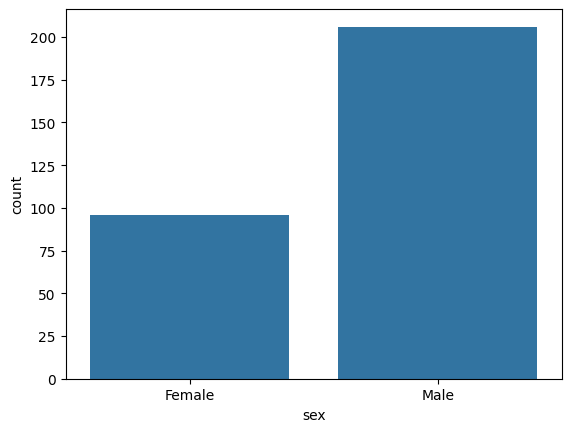

In [12]:
sns.countplot(x = 'sex', data = data)
plt.xticks([0,1],['Female','Male'])
plt.show()
# in this dataset the number of males is more than the females. 


# 3. find Gender distribution according to the target variable 

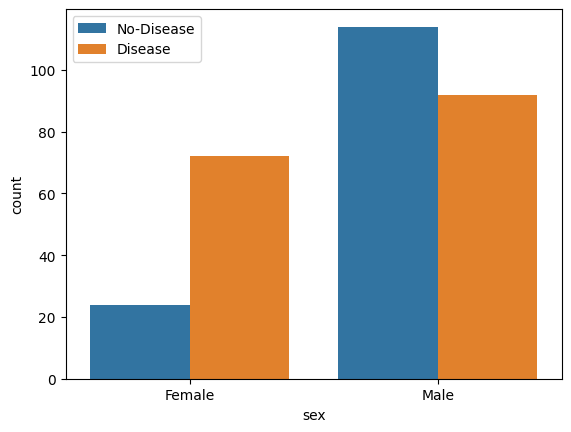

In [14]:
sns.countplot(x = 'sex',hue = 'target', data = data)
plt.xticks([1,0],['Male', 'Female'])
plt.legend(labels = ['No-Disease', 'Disease'])
plt.show()
# in the female category the number of diseased people is comparitively more than in the male category. 

# 4. check age distribution in the the dataset 

C:\Users\user\AppData\Local\Temp\ipykernel_1912\2303896027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],bins= 20)


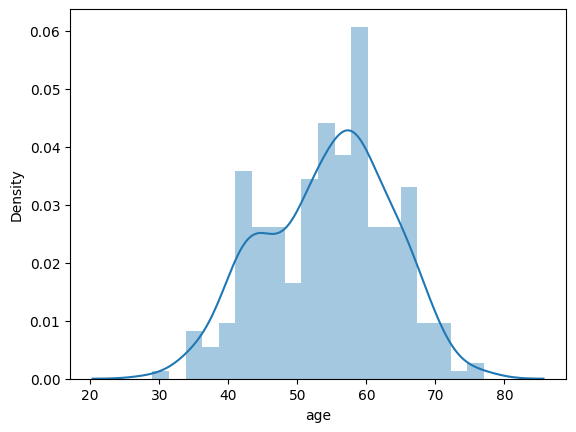

In [7]:
sns.distplot(data['age'],bins= 20)
plt.show() # this is for better visualization
# from this figure we can see that most of the people are between 50 and 60

# 5. check chest pain type
chest pain type (4 values)
        1.	value 0 : typical angina (also known as stable angina, refers to chest pain or discomfert that's triggered by 
        physical exertion or emotional stress and relieved by rest or nitroglycerine.)
        2.	value 1 : atypical angina ( chest pain that doesn't fully fit the typical description of angina but is still considered consistent with a           cardiac ischemic causes. 
        3.	value 2 : non-anginal pain (it is not related to heart disease, such as angina ) 
        4.	value 3 : asymptomatic (it occurs when the heart's blood supply is reduced without causing noticeable pain or discomfort.)


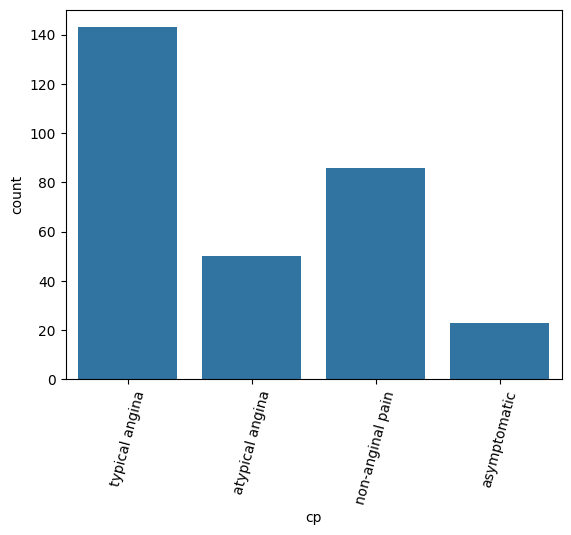

In [15]:
sns.countplot(x = 'cp',data = data)
plt.xticks([0,1,2,3],['typical angina', 'atypical angina','non-anginal pain','asymptomatic'])
plt.xticks(rotation = 75)
plt.show()
# it shows that most of the people have typical angina

# 6. show the chest pain distribution as per target variable


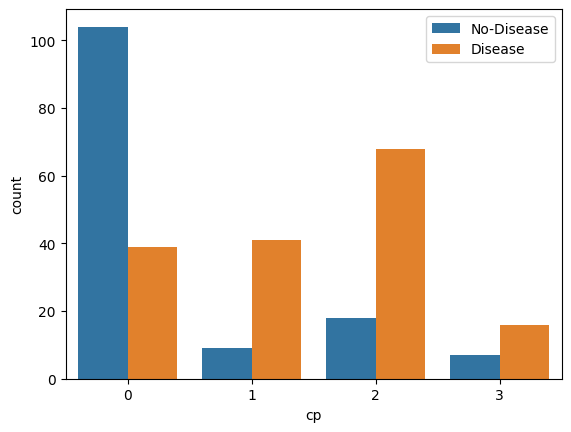

In [25]:
sns.countplot(x = 'cp',hue = 'target',data = data )
plt.legend(labels = ['No-Disease','Disease'])
plt.show()

#Those having typical angina have less chance of heart attack compared to other types of chest pain, 
#particularly non-anginal pain, which has a high chance of heart attack. 

# 7.show fasting blood sugar distribution according to target variable 

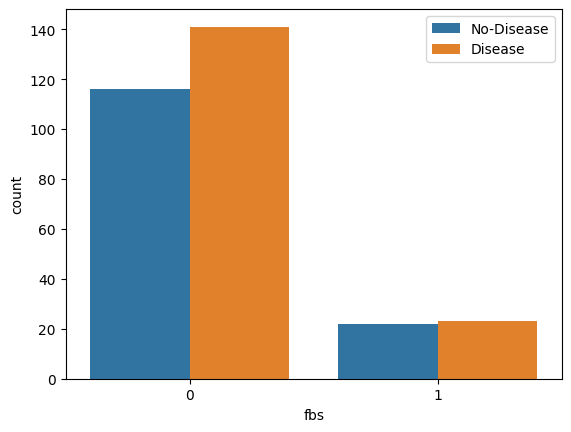

In [5]:
sns.countplot(x = 'fbs',hue = 'target', data = data ) # 1 = less than 120 fbs, 0 = more than 120 fbs
plt.legend(labels = ['No-Disease','Disease'])
plt.show()

#many people have fasting blood sugar more than 120 causing a high chance of heart attack.

# 8.check resting blood pressure distribution
normal blood pressure for most adults is considered to be less than 120/80 mm hg)

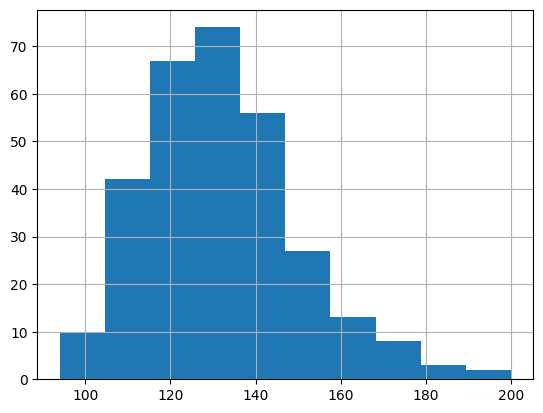

In [6]:
 data['trestbps'].hist()
plt.show()

#most of the people have blood pressure ranging from 120 to 140

# to call a single column only 


In [43]:
print(data.trestbps)

0      125
1      140
2      145
3      148
4      138
      ... 
723    120
733    108
739    128
843    160
878    120
Name: trestbps, Length: 302, dtype: int64


# 9. compare resting blood pressure as per sex column 

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


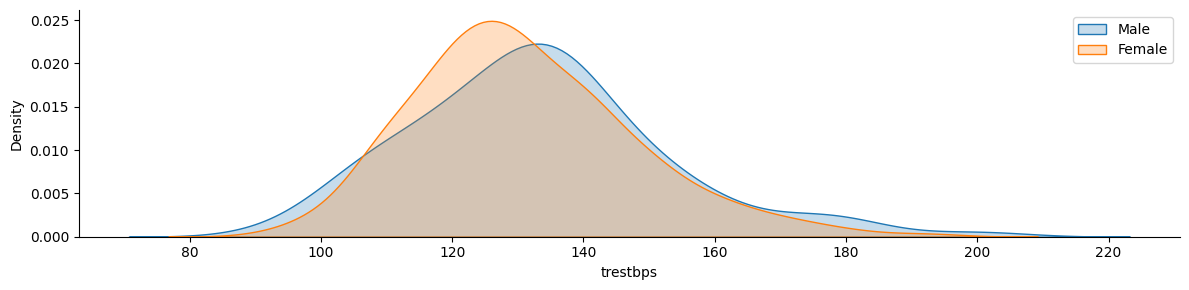

In [8]:
g = sns.FacetGrid(data,hue='sex',aspect=4) 
g.map(sns.kdeplot,'trestbps',shade= True)
plt.legend(labels=['Male','Female'])
plt.show()
# from here we can see that most of the females have lower resting blood pressure around 120 compared to males a bit less than 140. 

# 10. show distribution of serum cholesterol

serum cholestrol refers to the total amount of cholesterol circulating in blood,
including different types like HDL (good cholesterol) and LDL ( bad cholesterol)
below 200 mg/dL is considered normal range of cholesterol 

<Axes: >

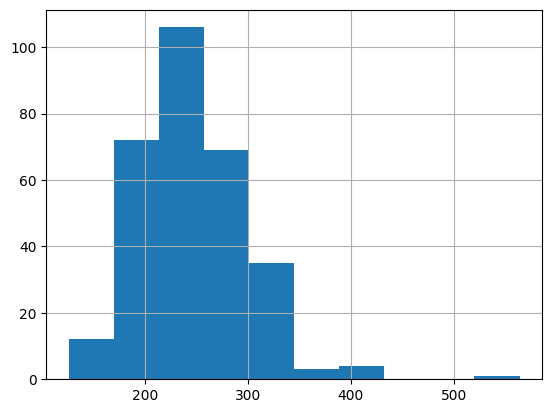

In [45]:
data['chol'].hist() # from it we can see that most of the people have serum cholesterol ranging from 200 to 300. 

# 11. plot continuous variable 
to separate columns based on the types of numerical values they contain. 

In [49]:
int_val=[]
cont_val=[]
for column in data.columns:
    if data[column].nunique() <=10:
        int_val.append(column)
    else:
        cont_val.append(column)

In [50]:
int_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [51]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

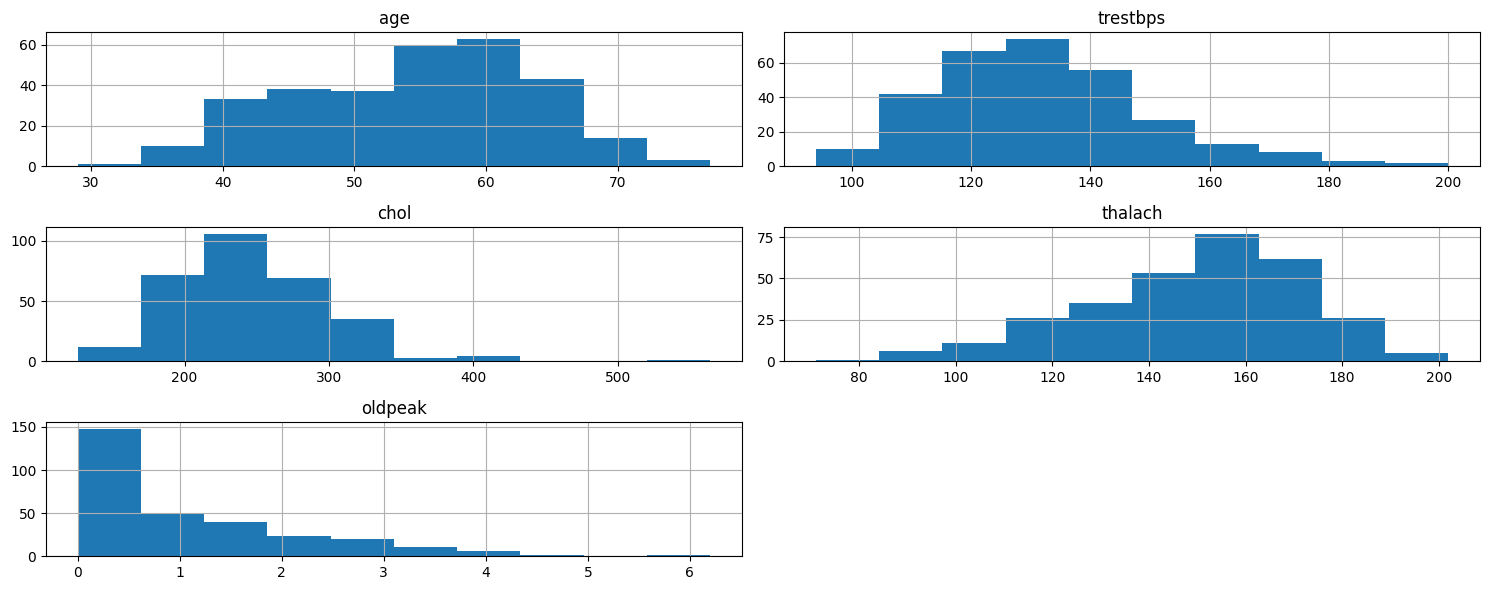

In [52]:
data.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()

# normal heart rate is between 60 and 100 beats per minute. 
# here in thalach figure it shows that many people having a heart rate between 120 and 140 which indicates various health-related issues. 
# in oldpeak graph many people have oldpeak in 0-1 range referring low to a bit higher ST depression, it means many people have a chance of associating with heart disease.